In [1]:
debugging = True
IPTS = 19558

# Description

You will be able to select a folder containing either **tiff** or **fits** images, and the notebook will simply display the integrated signal

# Python Import

In [2]:
from __code.__all import custom_style
custom_style.style()

In [3]:
from __code import utilities, gui_widgets, file_handler
import NeuNorm
import re
from NeuNorm.normalization import Normalization
import ipywe.fileselector

import matplotlib.patches as patches
%matplotlib notebook
import matplotlib.pyplot as plt

if debugging:
    ipts = IPTS
else:
    ipts = utilities.get_ipts()
working_dir = utilities.get_working_dir(ipts=ipts, debugging=debugging)
print("Working dir: {}".format(working_dir))

Working dir: /Volumes/my_book_thunderbolt_duo/IPTS/IPTS_19558


# Select Input Folder

In [4]:
input_folder_ui = ipywe.fileselector.FileSelectorPanel(instruction='Select Input Folder', type='directory', start_dir=working_dir, multiple=False)
input_folder_ui.show()

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

# Load Stack

In [5]:
input_folder = input_folder_ui.selected
list_fits = glob.glob(input_folder + '/*.fits')

list_fits = file_handler.remove_file_from_list(list_files=list_fits, regular_expression='.*_SummedImg.fits')

stack = file_handler.load_data(filenames=list_fits, showing_progress=True)

In [7]:
integrated_stack = np.array(stack).sum(axis=0)

<IPython.core.display.Javascript object>


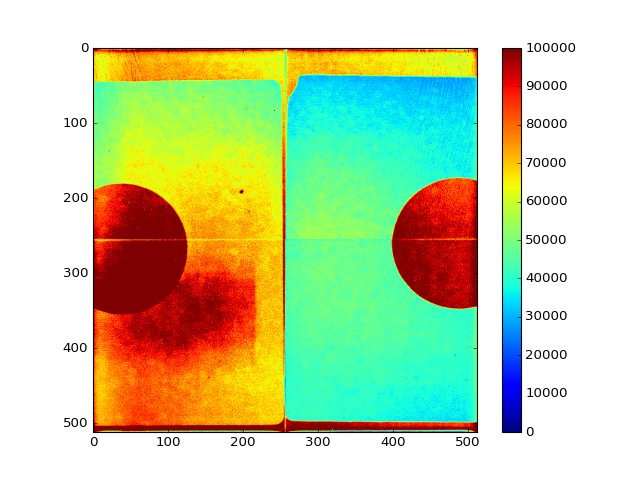

In [8]:
plt.figure()
plt.imshow(integrated_stack, vmin=0, vmax=100000 ) # cmap='viridis'
plt.colorbar()